<a href="https://colab.research.google.com/github/Dinesh2994/NLP/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data fromkeras.datasets and perform following computational analysis:- [CO3]
(a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

 (f)  Evaluate Model’s accuracy

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb

vocab_size = 10000
maxlen = 200

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build the model
model = Sequential()
model.add(Embedding(vocab_size, 128))  # Removed input_length
model.add(GRU(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 166s 522ms/step - accuracy: 0.6971 - loss: 0.5430 - val_accuracy: 0.8518 - val_loss: 0.3612
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.8464 - loss: 0.3712
Test Loss: 0.3681650459766388
Test Accuracy: 0.8464000225067139


Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets.

Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 370ms/step - accuracy: 0.6834 - loss: 0.5603 - val_accuracy: 0.8314 - val_loss: 0.3723
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 361ms/step - accuracy: 0.8924 - loss: 0.2721 - val_accuracy: 0.8464 - val_loss: 0.3522
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8463 - loss: 0.3541
LSTM Model Accuracy: 0.8487
Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 386ms/step - accuracy: 0.6499 - loss: 0.5947 - val_accuracy: 0.8370 - val_loss: 0.3722
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 381ms/step - accuracy: 0.8883 - loss: 0.2808 - val_accuracy: 0.8436 - val_loss: 0.3801
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8400 - loss: 0.3891
GRU Model Accuracy: 0.8403


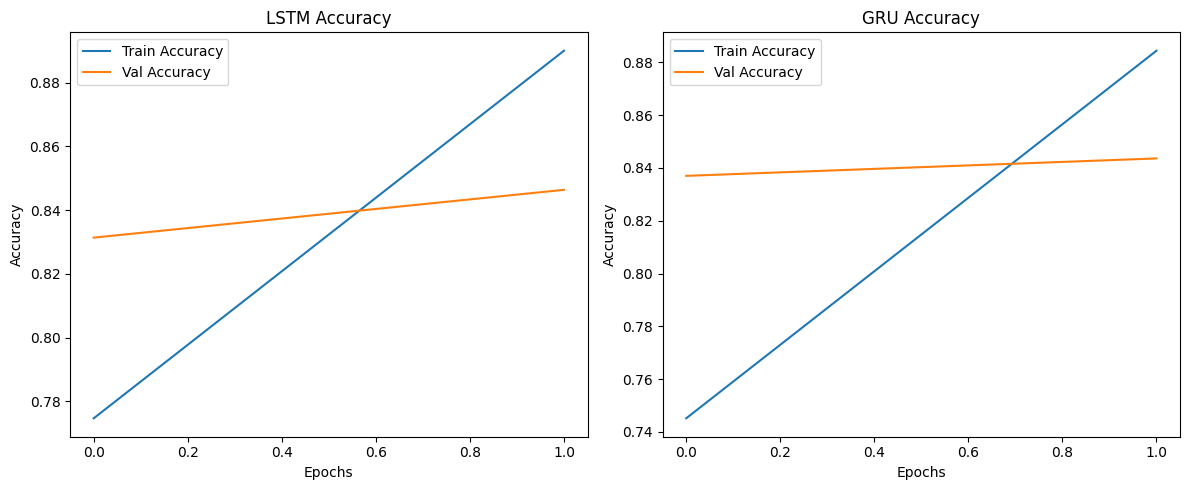

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

max_words = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(GRU(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Val Accuracy')
plt.title('GRU Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()